/Applications/anaconda/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1767: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  axisbgc = ax.get_axis_bgcolor()
/Applications/anaconda/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1623: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  fill_color = ax.get_axis_bgcolor()
/Applications/anaconda/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3260: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Applications/anaconda/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3269: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


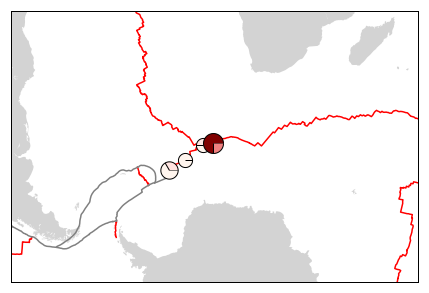

In [43]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math

# Load file with Fractional Melting Output, from reemodel_v5.m
xl = pd.ExcelFile('SWIR_input.xlsx')

ridge_latlong = xl.parse('Sheet5').as_matrix()
ridge_olopx = ridge_latlong[ridge_latlong[:,4]==1,:]
ridge_fO2 = ridge_olopx[:,5] # Bryndzia and Wood, our fO2
ridge_loc = ridge_olopx[:,1] # Ridge location code
lat_ridge = ridge_olopx[:,2] # Latitudes from all ridges
long_ridge = ridge_olopx[:,3] # Longtitudes from all ridge segments

SWIR_latlong = xl.parse('Sheet3').as_matrix()
SWIR_fO2 = SWIR_latlong[:,0]
SWIR_loc = SWIR_latlong[:,6]
SWIR_lat = SWIR_latlong[:,7]
SWIR_long = SWIR_latlong[:,8]

def plot_boundary(file,clr):
    f = open(file)
    lines = f.readlines()
    f.close()

    x = []
    y = []
    first = True
    for line in lines:
        data = line.split()
        if first == True:
            first = False
        elif line == '\n':
            break
        elif line[0] == '>':
            lat,long = m(x,y)
            m.plot(lat,long,linewidth=1.5,color=clr)
            x = []
            y = []
        else:
            x1 = float(data[0])
            y1 = float(data[1])
            if len(y)>0 and (0-x[len(x)-1])*(0-x1)<0: #replace 0 w/ map middle to keep lines from plotting across
                lat,long = m(x,y)
                m.plot(lat,long,linewidth=1.5,color='r')
                x = []
                y = []            
            x.append(x1)
            y.append(y1)

def draw_pie(ax,ratios=[0.4,0.3,0.3], X=0, Y=0, size = 1000):
    N = len(ratios)
    colors = ['maroon','lightcoral','mistyrose','seashell','lavender','lightskyblue','cornflowerblue','midnightblue']
 
    xy = []

    start = 0.
    n = 0
    clrs = []
    for ratio in ratios:
        if ratio==0:
            d = 0
        else:
            x = [0] + np.cos(np.linspace(2*math.pi*start,2*math.pi*(start+ratio), 30)).tolist()
            y = [0] + np.sin(np.linspace(2*math.pi*start,2*math.pi*(start+ratio), 30)).tolist()
            xy1 = list(zip(x,y))
            xy.append(xy1)
            start += ratio
            clrs.append(n)
            #xy1 = np.vstack([x,y])
            #xy = xy1.transpose()
        n+=1

    for i, xyi in enumerate(xy):
        ax.scatter([X],[Y] , marker=(xyi,0), s=size, facecolor=colors[clrs[i]], edgecolor='black',zorder=10 )        

fig = plt.figure()
fig.set_size_inches(10, 5)
 
# make sure the value of resolution is a lowercase L,
#  for 'low', not a numeral 1
m = Basemap(width=12000000,height=8000000,projection='stere',lat_0=-55, lon_0=7, 
              resolution='l', area_thresh=1000.0)
 
#m.drawcoastlines()
#m.drawcountries()
m.fillcontinents(color='lightgray')
m.drawmapboundary()
 
#m.drawmeridians(np.arange(0, 360, 30))
#m.drawparallels(np.arange(-90, 90, 30))

plot_boundary('ridge.txt', 'r')
plot_boundary('transform.txt', 'gray')
plot_boundary('trench.txt', 'gray')

ax = plt.subplot(111)

First = True
fO2_bins = np.zeros(8)
for i in range(len(lat_ridge)):
    if First==True:
        First=False
    elif ridge_loc[i] != ridge_loc[i-1]:
        ratios = fO2_bins/sum(fO2_bins)
        X,Y = m(long_ridge[i-1],lat_ridge[i-1])
        draw_pie(ax,ratios, X, Y,size=100*(sum(fO2_bins)))         
        fO2_bins = np.zeros(8)

    if ridge_fO2[i] < -1.0: fO2_bins[0] += 1
    elif -1.0 <= ridge_fO2[i] < -0.5: fO2_bins[1] += 1
    elif -0.5 <= ridge_fO2[i] < 0: fO2_bins[2] += 1
    elif 0 <= ridge_fO2[i] < 0.5: fO2_bins[3] += 1
    elif 0.5 <= ridge_fO2[i] < 1.0: fO2_bins[4] += 1
    elif 1.0 <= ridge_fO2[i] < 1.5: fO2_bins[5] += 1
    elif 1.5 <= ridge_fO2[i] < 2: fO2_bins[6] += 1
    else: fO2_bins[7] += 1
    
    if i==len(lat_ridge)-1:
        ratios = fO2_bins/sum(fO2_bins)
        X,Y = m(long_ridge[i],lat_ridge[i])
        draw_pie(ax,ratios, X, Y,size=100*(sum(fO2_bins)))         
        fO2_bins = np.zeros(8)        

plt.savefig('topo.eps')
plt.show()

/Applications/anaconda/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1767: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  axisbgc = ax.get_axis_bgcolor()
/Applications/anaconda/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1623: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  fill_color = ax.get_axis_bgcolor()
/Applications/anaconda/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3260: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Applications/anaconda/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3269: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


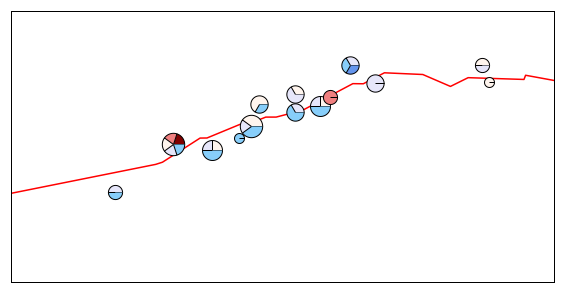

In [41]:
fig = plt.figure()
fig.set_size_inches(10, 5)
 
# make sure the value of resolution is a lowercase L,
#  for 'low', not a numeral 1
m = Basemap(width=400000,height=200000,projection='stere',lat_0=-52.7, lon_0=13, 
              resolution='l', area_thresh=100.0)
 
#m.drawcoastlines()
#m.drawcountries()
m.fillcontinents(color='lightgray')
m.drawmapboundary()
 
#m.drawmeridians(np.arange(0, 360, 30))
#m.drawparallels(np.arange(-90, 90, 30))

plot_boundary('ridge.txt', 'r')
plot_boundary('transform.txt', 'gray')
plot_boundary('trench.txt', 'gray')

ax = plt.subplot(111)

First = True
fO2_bins = np.zeros(8)
for i in range(len(SWIR_lat)):
    if First==True:
        First=False
    elif SWIR_loc[i] != SWIR_loc[i-1]:
        ratios = fO2_bins/sum(fO2_bins)
        X,Y = m(SWIR_long[i-1],SWIR_lat[i-1])
        draw_pie(ax,ratios, X, Y,size=100*(sum(fO2_bins)))         
        fO2_bins = np.zeros(8)

    if SWIR_fO2[i] < -1.0: fO2_bins[0] += 1
    elif -1.0 <= SWIR_fO2[i] < -0.5: fO2_bins[1] += 1
    elif -0.5 <= SWIR_fO2[i] < 0: fO2_bins[2] += 1
    elif 0 <= SWIR_fO2[i] < 0.5: fO2_bins[3] += 1
    elif 0.5 <= SWIR_fO2[i] < 1: fO2_bins[4] += 1
    elif 1 <= SWIR_fO2[i] < 1.5: fO2_bins[5] += 1
    elif 1.5 <= SWIR_fO2[i] < 2: fO2_bins[6] += 1
    else: fO2_bins[7] += 1
    
    if i==len(SWIR_lat)-1:
        ratios = fO2_bins/sum(fO2_bins)
        X,Y = m(SWIR_long[i], SWIR_lat[i])
        draw_pie(ax,ratios, X, Y,size=100*(sum(fO2_bins)))         
        fO2_bins = np.zeros(8)        

plt.savefig('SWIR_map_pie.eps')
plt.show()